**LIVE FACE** **DETECTION**

In [1]:
# This cell performs a step in the analysis
!pip install opencv-python opencv-python-headless

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# This cell performs a step in the analysis
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# pretrain face detection model
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [4]:
# Function to detect faces and label them
def detect_face(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    person_count = 1  # Counter to label persons
    for (x, y, w, h) in faces:
        # Draw rectangle around face
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Create label text
        label = f"Person {person_count}"
        person_count += 1

        # Put label above the rectangle
        cv2.putText(img, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.8, (0, 255, 0), 2, cv2.LINE_AA)

    return img

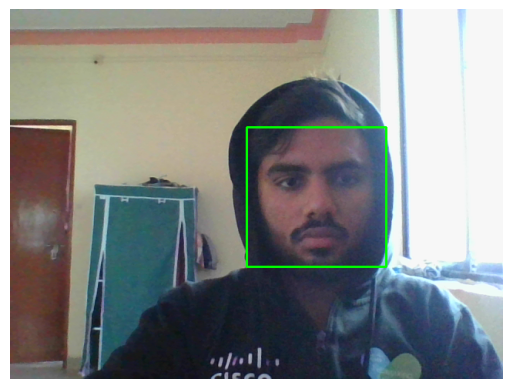

In [ ]:
import cv2
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Load Haar cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

cap = cv2.VideoCapture(0)  # open webcam

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Draw rectangles
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Show frame inline in Jupyter
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    clear_output(wait=True)
    plt.imshow(frame_rgb)
    plt.axis("off")
    display(plt.gcf())

cap.release()
